# In-silico perturbation

In dynamo paper [reference link], we introduce the analytical form of a vector field permits in silico perturbation predictions of expression response for each gene in each cell and the cell fate diversions after genetic perturbations. In particular, we demonstrated the predictive power of hematopoietic fate trajectory predictions after genetic perturbations. Interestingly, suppressing the master regulator of the GMP lineage, SPI1, diverts cells to megakaryocytes and erythrocytes, whereas suppressing the master regulator of the MEP lineage, GATA1, diverts cells to monocytes and neutrophils. Suppressing both genes, however, traps the cell in the progenitor state. These predictions align well with those reported in (Rekhtman et al., 1999) and reveal a seesaw-effect regulation between SPI1 and GATA1 in driving the GMP and the MEP lineages.  

In this tutorial, we will cover following topics:
- perturbation functionality and API in dynamo
- perturb gene expression levels individually or collectively in hematopoietic scNT-seq dataset
- visualize gene perturbation effects
  - reproduce results in dynamo paper figure7 [reference]



Similarly, suppressing the HSPC maintenance gene HLF1 triggers cells to move away from the progenitors (Lehnertz et al., 2021). 

### Perturbation method introduction

Import relevant packages

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import Scribe as sb
import sys
import os

# import scanpy as sc
import dynamo as dyn
dyn.dynamo_logger.main_silence()

In [19]:
# adata_labeling = dyn.read_h5ad("./data/hematopoietic_processed_v1.h5ad")

adata_labeling = dyn.sample_data.hematopoietic_processed()

take a glance at what is in `adata` object. All observations, embedding layers and other data in `adata` are computed within `dynamo`. Please refer to other dynamo tutorials regarding how to obtain these values from metadata and raw new/total and (or) raw spliced/unspliced gene expression values.

In [20]:
adata_labeling

AnnData object with n_obs × n_vars = 1947 × 1956
    obs: 'batch', 'time', 'cell_type', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'new_Size_Factor', 'initial_new_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'leiden', 'umap_leiden', 'umap_louvain', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'pca_ddhodge_div', 'pca_ddhodge_potential', 'umap_ori_ddhodge_div', 'umap_ori_ddhodge_potential', 'curl_umap_ori', 'divergence_umap_ori', 'control_point_umap_ori', 'inlier_prob_umap_ori', 'obs_vf_angle_umap_ori', 'acceleration_pca', 'curvature_pca', 'n_counts', 'mt_frac', 'jacobian_det_pca', 'manual_selection', 'divergence_pca', 'curvature_umap_ori', 'acceleration_umap_ori', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap', 'curvature_umap', 'curv_leiden', 'curv_louvain', 'SPI1->

## Perturb gene expression values
apply `dyn.pd.perturbation` to data, upregulate each gene and show visualization results. Multiple genes can be suppressed or activated during perturbation simulation.
    




### Induce hematopoietic stem cells with selected TFs  
**Define genes**  
During reprogramming committed murine blood cells to induced hematopoietic stem cells with defined factors, six transcription factors including Run1t1, Hlf, Lmo2, Prdm5, Pbx1, and Zfp37 impart multilineage transplantation potential onto otherwise committed lymphoid and myeloid progenitors and myeloid effector cells. Inclusion of Mycn and Meis1 and use of polycistronic viruses increase reprogramming efficacy.  

In [13]:
murine_blood_cells = ["RUN1T1", "HLF", "LMO2", "PRDM5", "PBX1", "ZFP37", "MYCN", "MEIS1"]
gran_lineage_genes = ["CEBPE", "RUNX1T1", "KLF1", "CEBPA", "FOSB", "JUN", "SPI1", "ZC3HAV1"]
erythroid_differentiation = ["GATA1", "TAL1", "LMO2", "KLF1", "MYB", "LDB1", "NFE2", "GFI1B", "BCL11A"]

### Supress GATA1 and SPI1 genes individually

Suppression of GATA1 diverts cells from GMP-related lineages to MEP-related lineages. 

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.3836s]


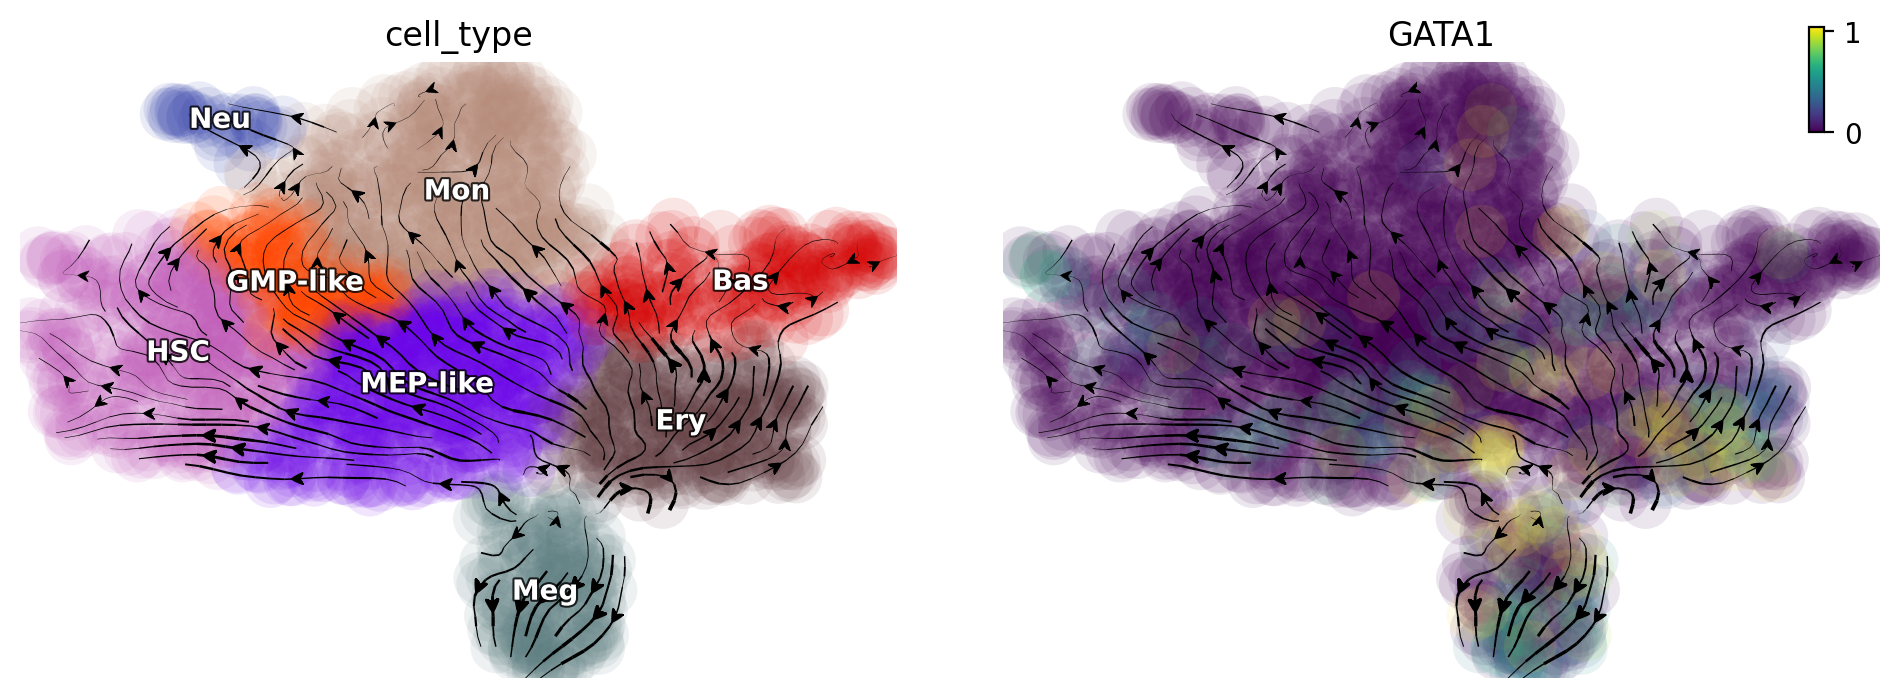

In [14]:
gene = "GATA1"
dyn.pd.perturbation(adata_labeling, gene, [-100], emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], basis="umap_perturbation")

Suppression of SPI1 diverts cells from MEP-related lineages to GMP-related lineages.

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.4244s]


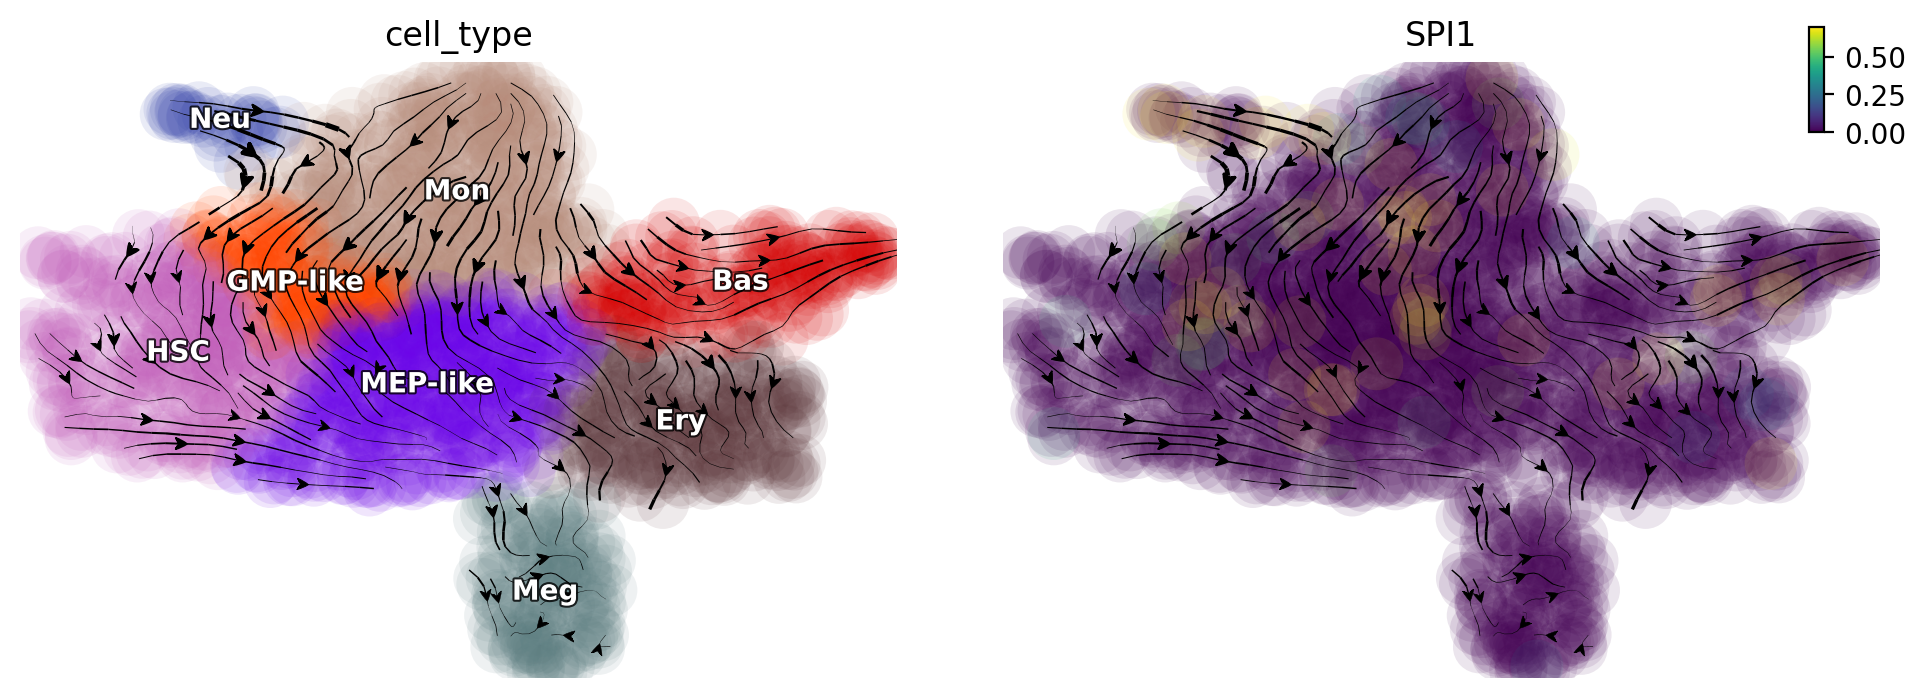

In [15]:
gene = "SPI1"
dyn.pd.perturbation(adata_labeling, gene, [-100], emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], basis="umap_perturbation")

### Supress SPI1/GATA at the same time  
 Suppression of both SPI1 and GATA1 traps cells in the progenitor states. This behavior is different from the cases in which we perturb SPI1 and GATA1 individually.

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.3513s]


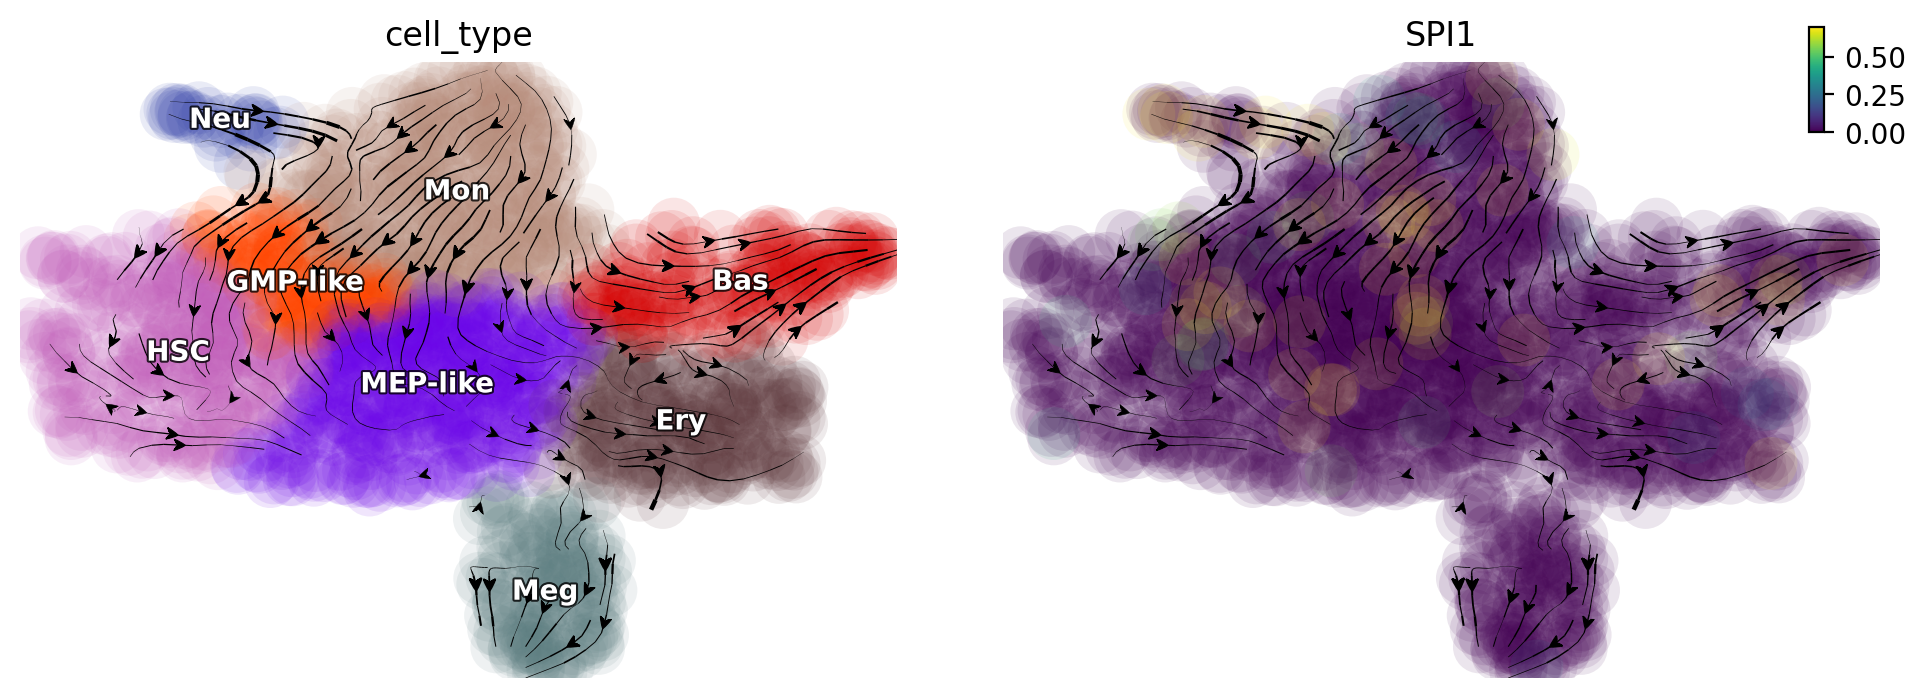

In [16]:
selected_genes =  [ "SPI1", "GATA1"]
# expr_vals = [-100, -100]
expr_vals = [-100, -15]
dyn.pd.perturbation(adata_labeling, selected_genes, expr_vals, emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], basis="umap_perturbation")


### Activate KLF1
Activating KLF1 leads to conversion into erythroid cells, consistent with (Orkin and Zon, 2008). 

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.3417s]


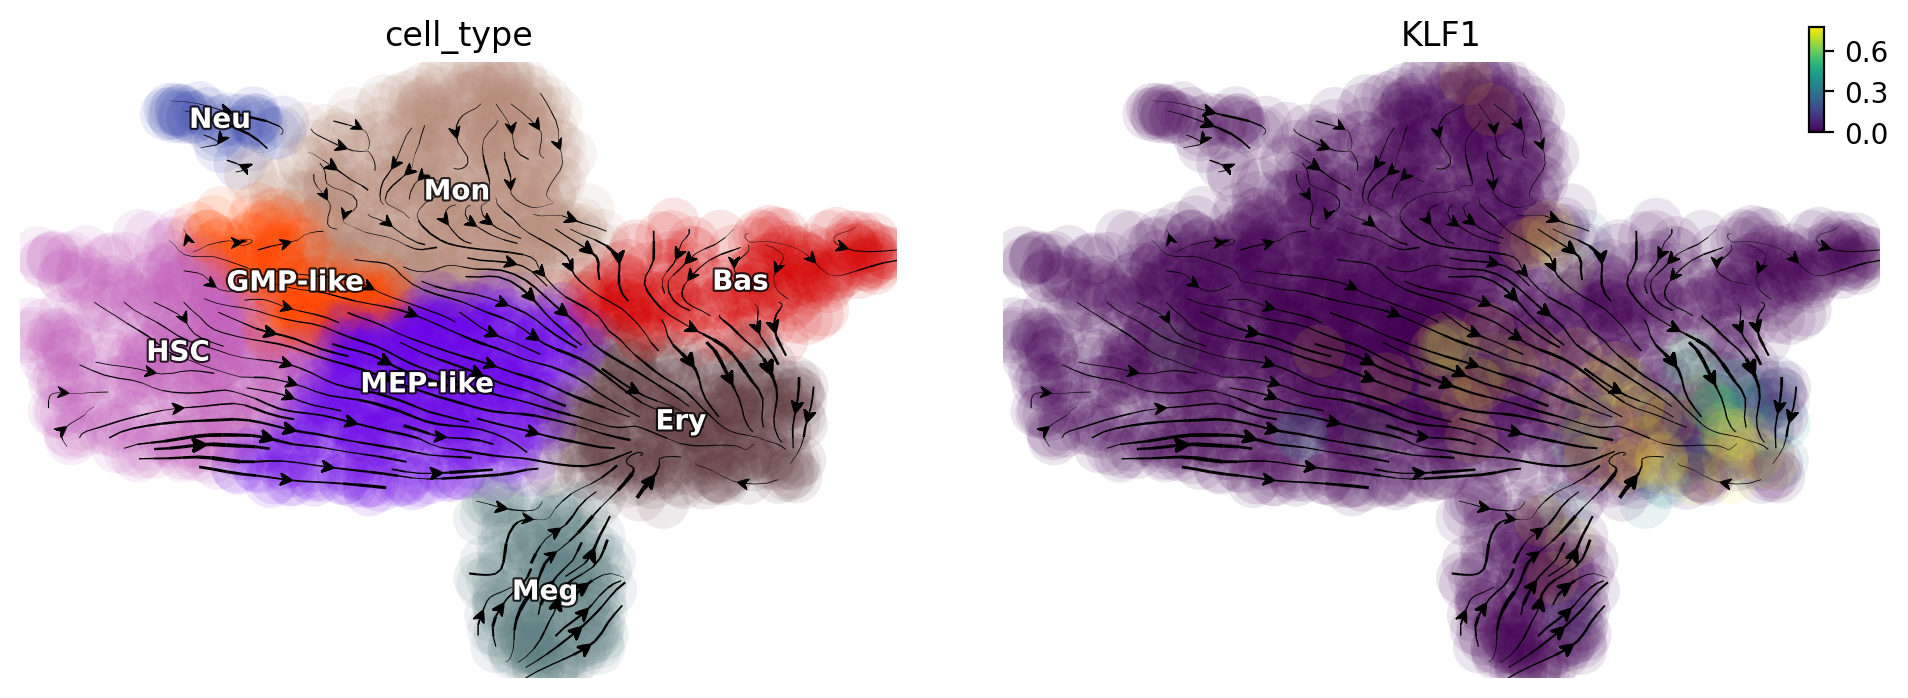

In [17]:
gene = "KLF1"
dyn.pd.perturbation(adata_labeling, gene, [100], emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], basis="umap_perturbation")

### Promote erythroid lineage: triple activation
Triple activation of GATA1, KLF1, and TAL1, known erythrocyte factors, and TFs used for reprogramming fibroblasts into erythrocytes, diverts most other cells into the Ery lineage (Capellera-Garcia et al., 2016).

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.3592s]


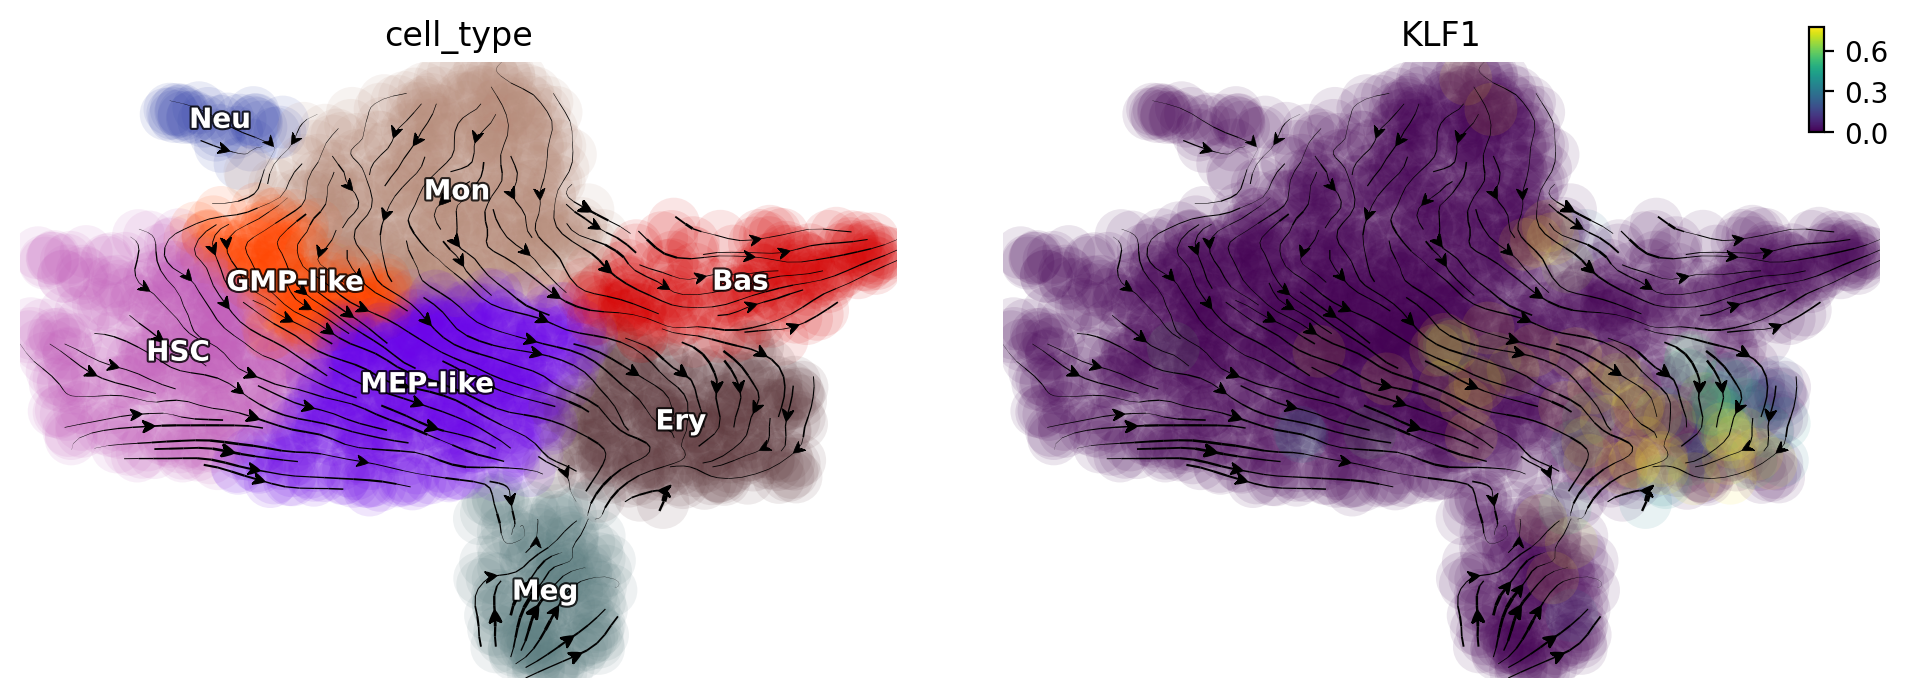

In [18]:
selected_genes =  ["GATA1", "KLF1", "TAL1"]
expr_vals = [100, 100, 100]
dyn.pd.perturbation(adata_labeling, selected_genes, expr_vals, emb_basis="umap")
dyn.pl.streamline_plot(adata_labeling, color=["cell_type", gene], basis="umap_perturbation")
